In [5]:
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.basic_optical_gating import AdaptedV as BOGV
from classes.drawer import Drawer
from classes.plotter import BasicOpticalGatingPlotter as BOGP

In [6]:
import copy
import numpy as np
import matplotlib.pyplot as plt

In [7]:
sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

sequence = "D:/Data/both 800fps/brightfield/*tif"
reference_sequence = "D:/Data/both 800fps/ref_seq.tif"
reference_sequence_period = "D:/Data/both 800fps/ref_seq.txt"


og = BOG()
og.logger.set_normal()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 2000 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 311 frames
BOG i Setting reference period to 306.26237218280687
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ⚠ Subframe minima outside range -1.1809516251216252 setting to -0.5
BOG ⚠ Subframe minima outside range -1.2729505820253615 setting to -0.5
BOG ⚠ Subframe minima outside range -1.6514048293934018 setting to -0.5
BOG ⚠ Subframe minima outside range 1.5274655414209617 setting to 0.5
BOG ⚠ Subframe minima outside range 1.2389907874583628 setting to 0.5
BOG ⚠ Subframe minima outside range 1.19413485171044 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5532822826707683 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5189023782546307 setting to 0.5
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Fin

In [8]:
from scipy import stats

In [9]:
sads = []
for i in range(100):
    sad = []
    for j in range(og.reference_sequence.shape[0]):
        sad.append(stats.pearsonr(og.sequence[i].flatten(), og.reference_sequence[j].flatten())[0])
    sads.append(sad)


print(sad[0])

0.922426769490934


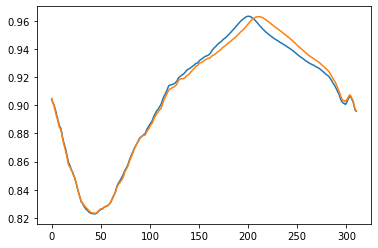

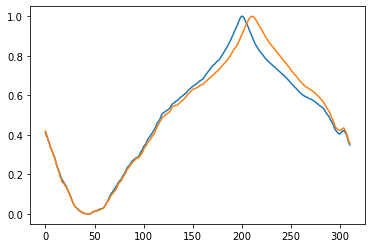

In [10]:
frame = 10
plt.plot(sads[frame])
plt.plot(sads[frame+10])
plt.show()
plt.plot(-(og.sads[frame] - np.min(og.sads[frame])) / np.max(og.sads[frame] - np.min(og.sads[frame])) + 1)
plt.plot(-(og.sads[frame + 10] - np.min(og.sads[frame + 10])) / np.max(og.sads[frame + 10] - np.min(og.sads[frame + 10])) + 1)
plt.show()

In [11]:
og.sads = -np.array(sads)
og.get_phases()
og.get_delta_phases()

BOG i Calculating phases...
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated


BOG i Loading sequence...
BOG ✓ Sequence loaded with 2000 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 311 frames
BOG i Setting reference period to 306.26237218280687
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ⚠ Subframe minima outside range -1.1809516251216252 setting to -0.5
BOG ⚠ Subframe minima outside range -1.2729505820253615 setting to -0.5
BOG ⚠ Subframe minima outside range -1.6514048293934018 setting to -0.5
BOG ⚠ Subframe minima outside range 1.5274655414209617 setting to 0.5
BOG ⚠ Subframe minima outside range 1.2389907874583628 setting to 0.5
BOG ⚠ Subframe minima outside range 1.19413485171044 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5532822826707683 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5189023782546307 setting to 0.5
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Fin

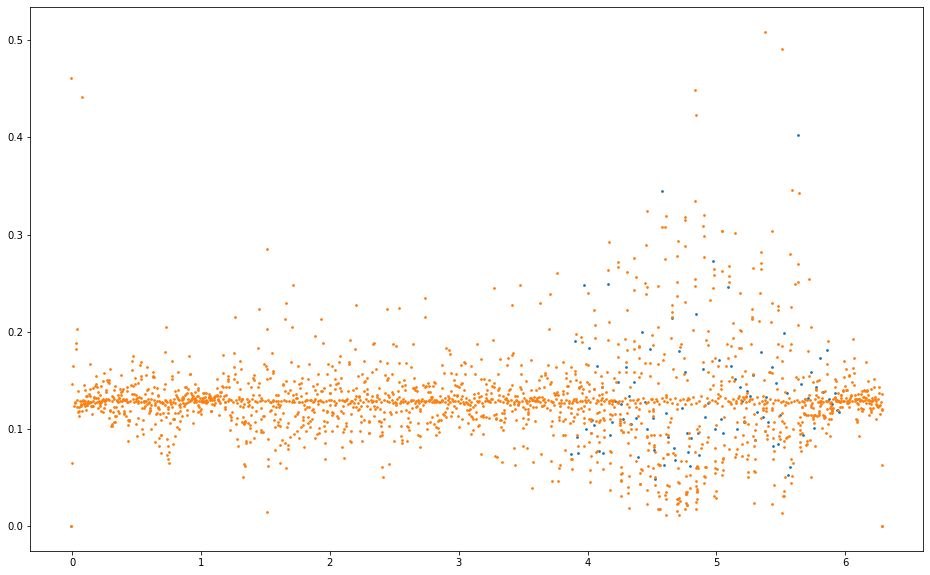

In [12]:
plt.figure(figsize = (16,10))
plt.scatter(og.phases[1::], og.delta_phases * (2 * np.pi), s = 3)
og = BOG()
og.logger.set_normal()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()
plt.scatter(og.phases[1::], og.delta_phases * (2 * np.pi), s = 3)
plt.show()

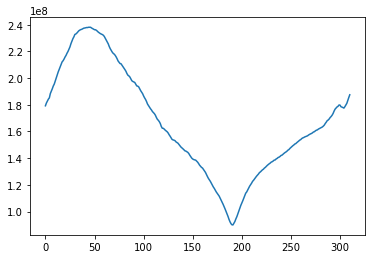

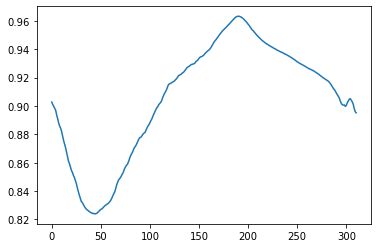

191
190


In [13]:
plt.plot(og.sads[0])
plt.show()
plt.plot(sads[0])
plt.show()

print(np.argmin(og.sads[0]))
print(np.argmax(sads[0]))

In [14]:
ref_sads = []
for i in range(og.reference_sequence.shape[0]):
    ref_sad = []
    for j in range(og.reference_sequence.shape[0]):
        ref_sad.append(np.sum(np.abs(og.reference_sequence[i].astype(np.int64) - og.reference_sequence[j].astype(np.int64))))
    ref_sads.append(ref_sad)
ref_sads = np.array(ref_sads)

In [15]:
from ipywidgets import interact, widgets



frame = 2
minima = np.argmin(og.sads[frame])

diffs = []
for weight in np.linspace(-1, 1, 1000):
    if weight < 0:
        sad = (ref_sads[minima - 1] * abs(weight) + ref_sads[minima] * (1 - abs(weight)))[0:30]
    else:
        sad = (ref_sads[minima] * (1-weight) + ref_sads[minima + 1] * (weight))[0:30]
    diffs.append(np.sum(np.abs(og.sads[frame][0:30] - sad)**2))

diffsssd = np.array(diffs) / np.max(diffs)

diffs = []
for weight in np.linspace(-1, 1, 1000):
    if weight < 0:
        sad = (ref_sads[minima - 1] * abs(weight) + ref_sads[minima] * (1 - abs(weight)))[0:30]
    else:
        sad = (ref_sads[minima] * (1-weight) + ref_sads[minima + 1] * (weight))[0:30]
    diffs.append(np.sum(np.abs(og.sads[frame][0:30] - sad)))

diffssad = np.array(diffs) / np.max(diffs)

fitmin = np.linspace(-1, 1, 1000)[np.argmin(diffs)]

def plot_sad_interpolation():
    from ipywidgets import interact, interactive, fixed, interact_manual
    #import ipywidgets as widgets

    xs2 = np.linspace(-1, 1, 1000)

    def plot_func(weight):
        xs = range(og.sads[0].shape[0])
        plt.figure(figsize = (16,9))
        if weight < 0:
            plt.scatter(xs,ref_sads[minima - 1] * abs(weight) + ref_sads[minima] * (1 - abs(weight)))
        else:
            plt.scatter(xs,ref_sads[minima] * (1-weight) + ref_sads[minima + 1] * (weight))
        plt.scatter(xs, og.sads[frame], c = "black")
        """if weight < 0:
            diff = ref_sads[minima - 1] * abs(weight) + ref_sads[minima] * (1 - abs(weight))
        else:
            diff = ref_sads[minima] * (1-weight) + ref_sads[minima + 1] * (weight)
        plt.plot(np.abs(og.sads[frame] - diff))
        plt.ylim(-10000, 200000)
        plt.show()"""
        """plt.axvline(weight, c= "black", ls = ":", label = "Current")
        plt.plot(xs2, diffsssd)
        plt.plot(xs2, diffssad)
        plt.show()"""

    interact(plot_func, weight = widgets.FloatSlider(min=-1, max=1, step=0.05, value=0))

plot_sad_interpolation()

interactive(children=(FloatSlider(value=0.0, description='weight', max=1.0, min=-1.0, step=0.05), Output()), _…

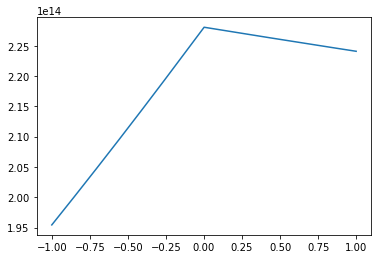

-1.0


In [16]:
region = np.arange(5,20)
diffs = []
for weight in np.linspace(-1, 1, 1000):
    if weight < 0:
        sad = (ref_sads[minima - 1] * abs(weight) + ref_sads[minima] * (1 - abs(weight)))[region]
    else:
        sad = (ref_sads[minima] * (1-weight) + ref_sads[minima + 1] * (weight))[region]
    diffs.append(np.sum(np.abs(og.sads[frame][region] - sad)**2))

plt.plot(np.linspace(-1, 1, 1000), diffs)
plt.show()

print(np.linspace(-1, 1, 1000)[np.argmin(diffs)])

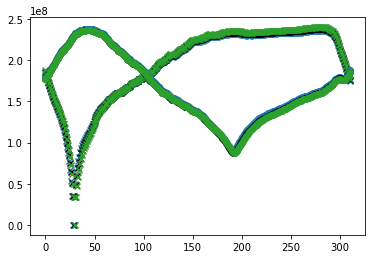

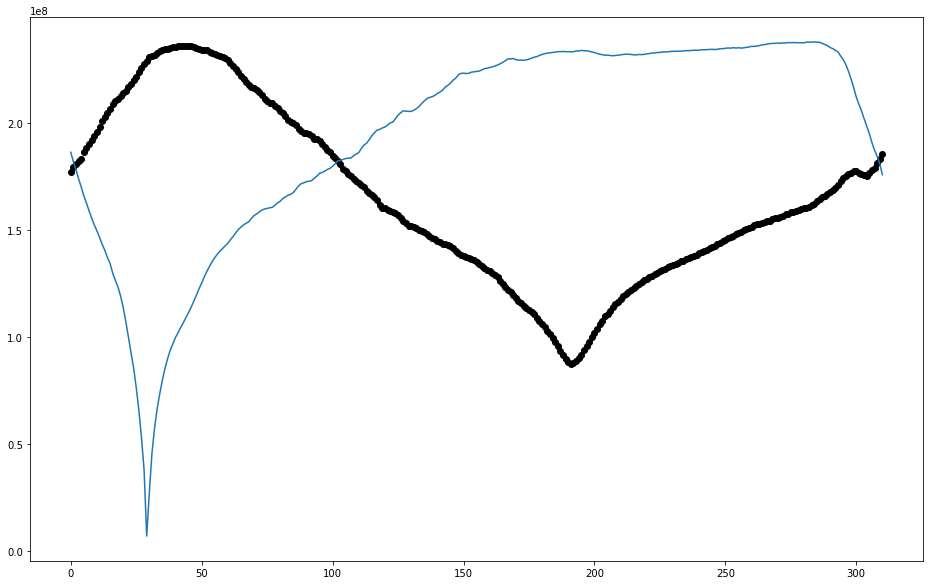

In [17]:
xs = range(og.sads[0].shape[0])

minima = (np.argmin(og.sads[1]))

plt.scatter(xs,ref_sads[28], c = "tab:blue", marker = "x")
plt.scatter(xs, ref_sads[29], c = "black", marker = "x")
plt.scatter(xs, ref_sads[30], c = "tab:green", marker = "x")
plt.scatter(xs, og.sads[0], c = "tab:blue")
plt.scatter(xs, og.sads[1], c = "black")
plt.scatter(xs, og.sads[2], c = "tab:green")
plt.show()

plt.figure(figsize = (16, 10))
plt.scatter(xs, og.sads[1], c = "black")
plt.plot(0.8 * ref_sads[29] + 0.2 * ref_sads[30])
plt.show()